In [7]:
from scipy import misc

In [3]:
img = Image.open('noisy_extra.jpg')

In [36]:
img = misc.imread('../../4-C12.png')

In [37]:
img.shape

(218, 580, 3)

In [39]:
misc.imsave('a.jpg', img[:218,:218])

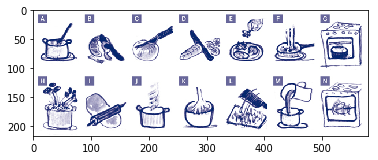

In [38]:
plt.imshow(img, cmap='gray')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import draw
from scipy.ndimage.filters import gaussian_filter
from skimage.filters import threshold_otsu
from scipy.ndimage.interpolation import rotate
from tqdm import tqdm
import random

%matplotlib inline

## Create example image

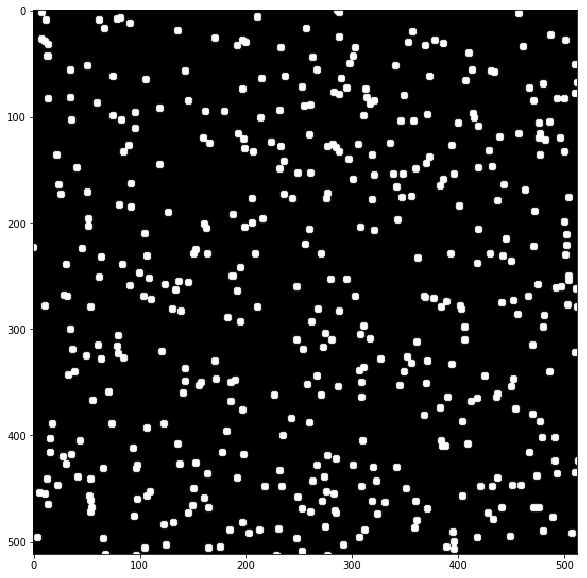

In [261]:
num_samples = 1000
size = 512
small_size = 64
k = 8
big_imgs = np.zeros((size, size), dtype = float)
centers = np.random.randint(0,600, size=(600,2))
radius = 4
arr = np.zeros((size, size))
for i,center in enumerate(centers):
    arr1 = np.zeros((size, size))
    rr, cc = draw.circle(center[0], center[1], radius, shape=arr1.shape)
    arr1[rr, cc] = 1
    arr = np.logical_or(arr, arr1)
arr2 = arr.astype(float)
arr2 = gaussian_filter(arr.astype(float), sigma=0.5)
#arr2 = (arr2 > threshold_otsu(arr2))
plt.figure(figsize=(10,10))
plt.imshow(arr2, cmap='gray')
plt.show()

In [375]:
# non-used function, let it just be, probably will be used in future
def create_colors_from_disks(n_d, n_t, l, rho): # take into account that l will change after optimal path is found
    parent_ind = np.random.randint(0, n_t, n_d)
    pos = np.random.randint(0, l, (n_d, 2))
    xx, yy = numpy.mgrid[:2*rho, :2*rho]
    colors = [np.zeros(l,l) for i in range(n_t)] 
    for i in range(n_d):
        circle_filled = (xx ** 2 + yy ** 2 < rho**2)
        pos_x = max(pos[i,0], 0)
        dist_x = 2*rho - (pos[i,0]-pos_x)
        pos_x_1 = min(l, pos[i,0]+2*rho)
        dist_x_1 = 2*rho - max(0, pos[i,0]+2*rho-l)
        
        pos_y = max(pos[i,1], 0)
        dist_y = 2*rho - (pos[i,1]-pos_y)
        pos_y_1 = min(pos[i,1]+2*rho, l)
        dist_y_1 = 2*rho - max(0, pos[i,1]+2*rho-l)
        
        colors[parent_ind[i]][pos_x:pos_x_1,pos_y:pos_y_1] = circle_filled[dist_x:dist_x_1, dist_y:dist_y_1]
    return colors, positions, parent_ind

## Tilings!!!

In [276]:
def create_colors_from_texture(texture, n, l, alpha):
    colors = []
    w = texture.shape[0]
    for i in tqdm(range(n)):
        '''
        alpha = np.random.rand()*np.pi/2
        #print(alpha)
        #print(np.round(l*np.cos(alpha)))
        #print(texture.shape[0]-np.round(l*np.cos(alpha)))
        while texture.shape[1]-np.round(l*np.cos(alpha))-np.round(l*np.sin(alpha)) <= 0 or \
        np.round(np.sin(alpha)*l) >= texture.shape[0]-np.round(l*np.cos(alpha)):
            alpha = np.random.rand()*np.pi/2
        x = np.random.randint(0, texture.shape[1]-np.round(l*np.cos(alpha))-np.round(l*np.sin(alpha))) # column
        y = np.random.randint(np.round(np.sin(alpha)*l),texture.shape[0]-np.round(l*np.cos(alpha))) # row
        '''
        '''
        while True:
            alpha = np.random.rand()*45
            rotated = rotate(texture, alpha, reshape=False)
            #rotated = (rotated > threshold_otsu(texture)).astype(int)
            alpha = alpha/180*np.pi
            a = w/(np.cos(alpha)+np.sin(alpha))
            if a >= l:
                l_1 = w*np.cos(alpha) - a*np.cos(alpha)**2
                x = np.random.randint(l_1, rotated.shape[0]-l_1-l) # row
                y = np.random.randint(l_1, rotated.shape[0]-l_1-l) 
                break
        '''
        rotated = rotate(texture, alpha, reshape=False)
        alpha = alpha/180*np.pi
        a = w/(np.cos(alpha)+np.sin(alpha))
        l_1 = w*np.cos(alpha) - a*np.cos(alpha)**2
        x = np.random.randint(l_1, rotated.shape[0]-l_1-l) # row
        y = np.random.randint(l_1, rotated.shape[0]-l_1-l) 
        #new_width = np.round(512*(np.sin(alpha/180*np.pi)+np.cos(alpha/180*np.pi)))
        #print(texture.shape[0]-np.ceil(l*np.cos(alpha)))
        
        #print(x, x+l)
        #print(y, y+l)
    
        img = rotated[x:x+l, y:y+l]
        '''
        img = np.zeros((l,l))
        i = 0
        j = 0
        for i in range(l):
            for j in range(l):
                img[i,j] = texture[int(np.round(y+i*np.cos(alpha)-j*np.sin(alpha))), int(np.floor(x+i*np.sin(alpha)+i*np.cos(alpha)))]
        '''
        colors.append(img)
    return colors

def find_all_combinations(n1, n2, n_NW):
    comb = np.asarray([str(i)+str(j) for i in range(n1) for j in range(n1, n1+n2)])
    new_comb = []
    used = []
    for k in range(n_NW):
        while True:
            restart = False
            to_choose = np.random.choice(comb, size = len(comb)) # random sample of SE edges
            for u in used:
                if sum(u == to_choose) != 0:
                    to_choose = np.random.choice(comb, size = len(comb))
                    restart = True
                    break
            if not restart:
                break
            used.append(to_choose)
        new_comb = new_comb + [comb[i] + to_choose[i] for i in range(len(comb))]
    return new_comb

In [376]:
colors = create_colors_from_texture(arr2, n_1+n_2, l, 45)
for c in colors:
    print(c.shape)

100%|██████████| 4/4 [00:00<00:00, 14.17it/s]

(100, 100)
(100, 100)
(100, 100)
(100, 100)


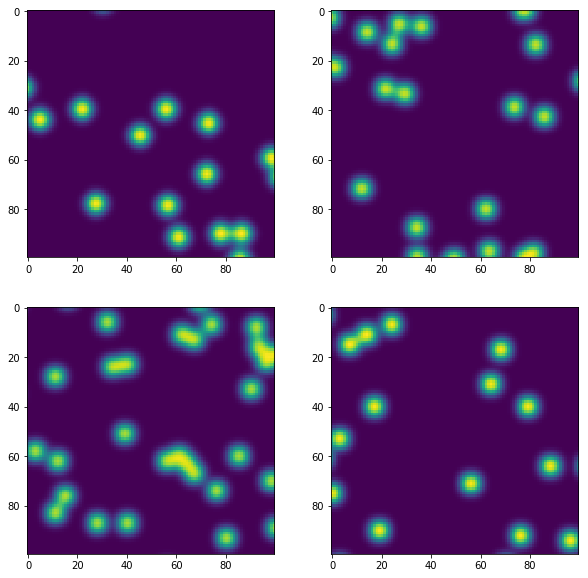

In [377]:
plt.figure(figsize=(10,10))
for i in range(n_1+n_2):
    plt.subplot(n_1,n_2, i+1)
    plt.imshow(colors[i])

In [411]:
def merge_two_parts(arr1, arr2, omega): # omega is width of overlap
    h,w = arr1.shape
    prev = np.empty((arr1.shape[0], omega), dtype=list)
    distances = np.full((arr1.shape[0], omega), fill_value=np.inf)
    distances[0] = np.ones(omega)
    merged = np.hstack([arr1, arr2[:,omega:]]) # resulting image
    #print(merged.shape)
    for i in range(1, arr1.shape[0]):
        for j in range(omega):
            weight_cur = (arr1[i-1,w-omega+j]-arr2[i,j])**2
                
            if j < omega-1 and j > 0:
                weight_prev = (arr1[i-1,w-omega+j-1]-arr2[i,j])**2
                weight_next = (arr1[i-1,w-omega+j+1]-arr2[i,j])**2
                
                if weight_cur <= weight_prev:
                    if weight_cur <= weight_next:
                        distances[i,j] = distances[i-1,j]+weight_cur
                        prev[i,j] = (i-1,j)
                    else:
                        distances[i,j] = distances[i-1,j+1]+weight_next
                        prev[i,j] = (i-1,j+1)
                else:
                    if weight_prev <= weight_next:
                        distances[i,j] = distances[i-1,j-1]+weight_prev
                        prev[i,j]= (i-1,j-1)
                    else:
                        distances[i,j] = distances[i-1,j+1]+weight_next
                        prev[i,j] = (i-1,j+1)
                        
            elif j < omega-1:
                weight_next = (arr1[i-1,w-omega+j+1]-arr2[i,j])**2
                if weight_cur <= weight_next:
                    distances[i,j] = distances[i-1,j]+weight_cur
                    prev[i,j] = (i-1,j)
                else:
                    distances[i,j] = distances[i-1,j+1]+weight_next
                    prev[i,j] = (i-1,j+1)
                    
            elif j > 0:
                weight_prev = (arr1[i-1,w-omega+j-1]-arr2[i,j])**2
                weight_cur = (arr1[i-1,w-omega+j]-arr2[i,j])**2
                if weight_cur <= weight_prev:
                    distances[i,j] = distances[i-1,j]+weight_cur
                    prev[i,j] = (i-1,j)
                else:
                    distances[i,j] = distances[i-1,j-1]+weight_prev
                    prev[i,j] = (i-1,j-1)
            else:
                distances[i,j] = distances[i-1,j]+weight_cur
                prev[i,j] = (i-1,j)
    
    j = np.argmin(distances[h-1])
    #path = paths
    for i in range(h):
        #print(prev[arr1.shape[0]-1-i,j])
        merged[h-1-i,w-omega+j:w] = arr2[h-1-i,j:omega]
        if i != h-1:
            i_prev, j_prev = prev[h-1-i,j]
            j = j_prev
    return merged[:,:w], merged[:,w-omega:]
                
    
def create_tilings(colors_comb, colors, n1, n2, n_total, a, l, omega):
    n_rep = int(n_total/n1**2/n2**2)
    h,w = arr1.shape
    tilings = {}
    center = l-1-omega//2 # l - size of image crop, a - resulting size of tile
    for i in range(n_total):
        c = []
        for num in colors_comb[i]:
            #print(num)
            c.append(colors[int(num)])
        final = np.zeros((a, a))
        for k in range(4):
            c[(k+1)%4] = np.rot90(c[(k+1)%4], axes=(1, 0))
            c[k], c[(k+1)%4] = merge_two_parts(c[k], c[(k+1)%4], omega)
            merged = np.hstack([c[k][:,:w-omega], c[(k+1)%4]])
            for j in range(omega//2, l):
                if k == 0:
                    tile_ind = j-omega//2
                    indices1 = np.arange(max(0,a-tile_ind-1), a)
                    if tile_ind < a:
                        ind1 = tile_ind
                    else:
                        ind1 = 2*a-1-tile_ind
                    indices2 = np.arange(ind1+1)
                    final[indices1, indices2] = merged[j, np.arange(center-ind1, center+ind1+1,2)]
                elif k == 1:
                    tile_ind = j-omega//2
                    if tile_ind < a:
                        ind1 = tile_ind
                        indices1 = np.arange(a-tile_ind-1,a)
                        indices2 = np.arange(a-1, a-tile_ind-1-1,-1)
                    else:
                        ind1 = 2*a - 1 - tile_ind
                        indices1 = np.arange(ind1+1)
                        indices2 = np.arange(2*a-1-tile_ind, -1, -1)

                    final[indices1, indices2] = merged[j, np.arange(center-ind1, center+ind1+1,2)]
                elif k == 2:
                    tile_ind = j-omega//2
                    if tile_ind < a:
                        ind1 = tile_ind
                        indices1 = np.arange(a-1,a-1-tile_ind-1,-1)
                        indices2 = np.arange(a-1,a-1-tile_ind-1,-1)
                    else:
                        ind1 = 2*a - 1 - tile_ind
                        indices1 = np.arange(a-1, tile_ind-1-a, -1)
                        indices2 = np.arange(a-1, tile_ind-1-a, -1)
                    final[indices1, indices2] = merged[j, np.arange(center-ind1, center+ind1+1,2)]
                elif k == 3:
                    tile_ind = j-omega//2
                    if tile_ind < a:
                        ind1 = tile_ind
                        indices1 = np.arange(tile_ind, -1, -1)
                        indices2 = np.arange(tile_ind+1)
                    else:
                        ind1 = 2*a - 1 - tile_ind
                        indices1 = np.arange(a-1, tile_ind-a-1, -1)
                        indices2 = np.arange(tile_ind-a, a)
                    final[indices1, indices2] = merged[j, np.arange(center-ind1, center+ind1+1,2)]
            
            c[(k+1)%4] = np.rot90(c[(k+1)%4])
        tilings.update({colors_comb[i]: final})
    return tilings


def enrich_tiles(tiles, enrichments, width):
    center_tile = tiles[list(tiles.keys())[0]].shape[0]//2
    center_enrichment = enrichments[0].shape[0]//2
    delta = center_tile-center_enrichment
    print(delta)
    i = 0
    for ind, tile in tiles.items():
        ar1, ar2 = merge_two_parts(np.rot90(tile[:width+delta,delta:-delta]), \
                                   np.rot90(enrichments[i][:width]),width)
        #print(ar2.shape)
        #print(enrichments[i][:width].shape)
        enrichments[i][:width] = np.rot90(ar2, axes=(1,0))
        
        ar1, ar2 = merge_two_parts(enrichments[i][:,-width:],tile[delta:-delta,-(width+delta):],width)
        enrichments[i][:,-width:] = ar1
        
        ar1, ar2 = merge_two_parts(np.rot90(enrichments[i][-width:]), \
                                   np.rot90(tile[-(width+delta):,delta:-delta]), width)
        enrichments[i][-width:] = np.rot90(ar1, axes=(1,0))
        
        ar1, ar2 = merge_two_parts(tile[delta:-delta,:(width+delta)],enrichments[i][:,:width],width)
        enrichments[i][:,:width] = ar2
        tiles[ind][delta:-delta,delta:-delta] = enrichments[i]
        i+=1
    return tiles

In [412]:
arr2 = gaussian_filter(arr.astype(float), sigma=2)

In [413]:
n_1 = 3
n_2 = 3
n_cs = n_1*n_2
n_NW = 2
n_total = int(n_NW*n_cs)
l = 100
w = 15
a = (2*l-w)//2
patch_border = 10

colors = create_colors_from_texture(arr2, n_1+n_2, l, 45)
patch_size = a - patch_border
enrichments = create_colors_from_texture(arr2, n_total, patch_size, 0)
comb = find_all_combinations(n_1, n_2, n_NW)
tiles = create_tilings(comb[:n_total], colors, n_1, n_2, n_total, a, l, w)

100%|██████████| 18/18 [00:00<00:00, 18.36it/s]


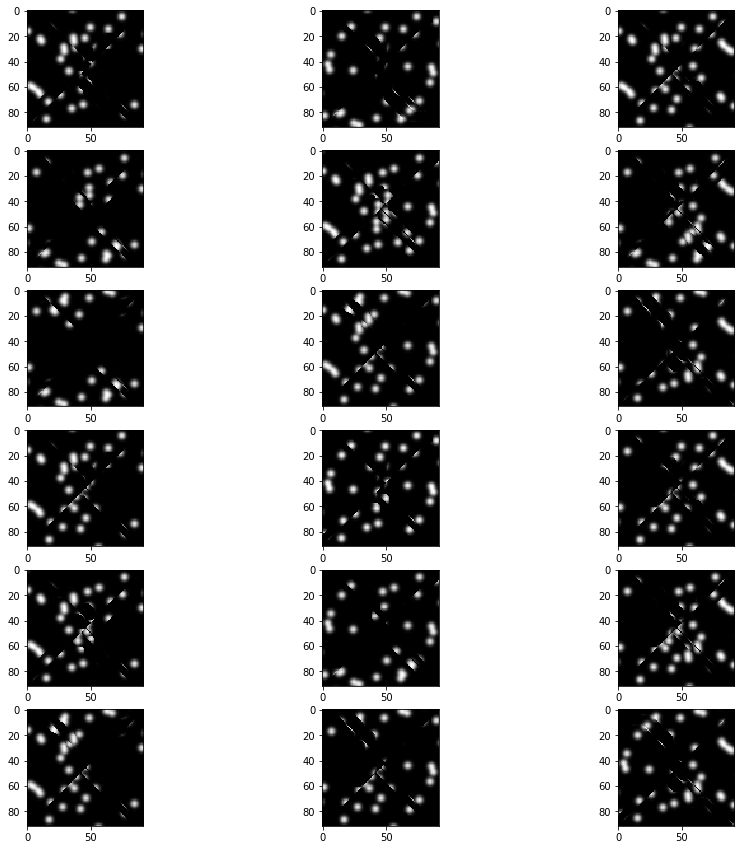

In [414]:
plt.figure(figsize = (15,15))
for i in range(n_total):
    plt.subplot(n_1*n_NW,n_2,i+1)
    plt.imshow(tiles[comb[i]], cmap='gray')

In [415]:
enriched_tiles = enrich_tiles(tiles, enrichments, 10)
tiles_1 = copy(tiles)
tiles = enriched_tiles

5


In [416]:
height = 5
width = 5

whole_img = np.zeros((height*a, width*a))

prev_border = random.sample(tiles.keys(), 1)[0]
prev_tile = tiles[prev_border]
whole_img[:a,:a] = prev_tile

history = [prev_border]
for i in range(height):
    for j in range(width):
        if i+j == 0:
            continue
        if j == 0:
            result = {key: value for key, value in tiles.items() if key[1] == prev_border[3]}
        else:
            result = {key: value for key, value in tiles.items() if key[1] == prev_border[3] and key[0] == prev_border[2]}
        prev_border = random.sample(result.keys(), 1)[0]
        prev_tile = result[prev_border]
        history.append(prev_border)
        whole_img[i*a:(i+1)*a, j*a:(j+1)*a] = prev_tile

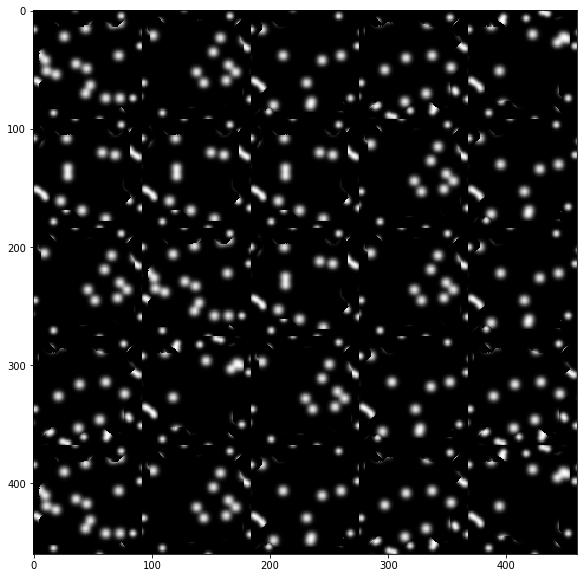

In [417]:
plt.figure(figsize=(10,10))
plt.imshow(whole_img, cmap = 'gray')

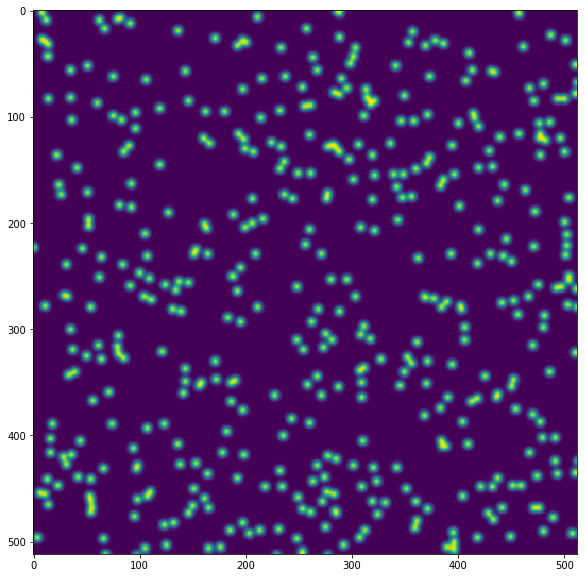

In [418]:
plt.figure(figsize=(10,10))

plt.imshow(arr2)

In [419]:
(whole_img > threshold_otsu(whole_img)).sum()

20900

In [420]:
(arr2 > threshold_otsu(arr2)).sum()

29773

## New image (here more or less correct algorithm)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import draw
from scipy.ndimage.filters import gaussian_filter
from skimage.filters import threshold_otsu
from scipy.ndimage.interpolation import rotate
from tqdm import tqdm
import copy
import random

%matplotlib inline

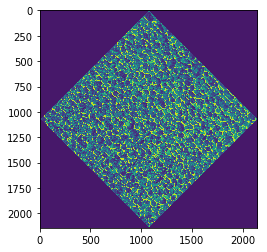

In [43]:
plt.imshow(rotate(image, 135, reshape=True))

In [66]:
def create_colors_from_texture(texture, n, l, alpha=0):  # only 2 values for alpha 0 or 45
    colors = []
    w = texture.shape[0]

    for i in tqdm(range(n)):
        
        rotated = rotate(texture, alpha, reshape=True)
        if alpha != 0:
            alpha = 45
        alpha = alpha/180*np.pi
        a = w/(np.cos(alpha)+np.sin(alpha))
        l_1 = w*np.cos(alpha) - a*np.cos(alpha)**2
        x = np.random.randint(l_1, rotated.shape[0]-l_1-l) # row
        y = np.random.randint(l_1, rotated.shape[0]-l_1-l) 
    
        img = rotated[x:x+l, y:y+l]
        colors.append(img)
        '''
        img = np.zeros((l,l))
        if alpha == 0:
            x = np.random.randint(texture.shape[0]-l)
            y = np.random.randint(texture.shape[1]-l)
            img = texture[x:x+l, y:y+l]
            #if i == 0:
            #    t = (x,y)
        elif alpha == 45:
            y = np.random.randint(0, texture.shape[0]-2*l-2)  # the leftest point in diamond
            x = np.random.randint(l-1, texture.shape[1]-l)  # the leftest point in diamond
            for i in range(l):
                ind_x = np.arange(l-1-i, l) 
                ind_y = np.arange(i+1)
                #print(np.arange(y+l-1-i,y+l+i, 2))
                #print(y)
                img[ind_x, ind_y] = image[x+(l-1-i),np.arange(y+l-1-i,y+l+i, 2)]
                img[ind_y, ind_x] = image[x-(l-1-i),np.arange(y+l-1-i,y+l+i, 2)]
                
        '''
        #print(img.shape)
        #colors.append(img)
        #print('a', img)
    return colors#, t

def find_all_combinations(n1, n2, n_NW):
    comb = np.asarray([str(i)+str(j) for i in range(n1) for j in range(n1, n1+n2)])
    new_comb = []
    used = []
    for k in range(n_NW):
        while True:
            restart = False
            to_choose = np.random.choice(comb, size = len(comb)) # random sample of SE edges
            for u in used:
                if sum(u == to_choose) != 0:
                    to_choose = np.random.choice(comb, size = len(comb))
                    restart = True
                    break
            if not restart:
                break
            used.append(to_choose)
        new_comb = new_comb + [comb[i] + to_choose[i] for i in range(len(comb))]
    return new_comb

In [67]:
def merge_two_parts(arr1, arr2, omega): # omega is width of overlap
    h,w = arr1.shape
    prev = np.empty((arr1.shape[0], omega), dtype=list)
    distances = np.full((arr1.shape[0], omega), fill_value=np.inf)

    distances[0] = np.ones(omega)
    merged = np.hstack([arr1, arr2[:,omega:]]) # resulting image

    for i in range(1, arr1.shape[0]):
        for j in range(omega):
            weight_cur = (arr1[i-1,w-omega+j]-arr2[i,j])**2
                
            if j < omega-1 and j > 0:
                weight_prev = (arr1[i-1,w-omega+j-1]-arr2[i,j])**2
                weight_next = (arr1[i-1,w-omega+j+1]-arr2[i,j])**2
                
                if weight_cur <= weight_prev:
                    if weight_cur <= weight_next:
                        distances[i,j] = distances[i-1,j]+weight_cur
                        prev[i,j] = (i-1,j)
                    else:
                        distances[i,j] = distances[i-1,j+1]+weight_next
                        prev[i,j] = (i-1,j+1)
                else:
                    if weight_prev <= weight_next:
                        distances[i,j] = distances[i-1,j-1]+weight_prev
                        prev[i,j]= (i-1,j-1)
                    else:
                        distances[i,j] = distances[i-1,j+1]+weight_next
                        prev[i,j] = (i-1,j+1)
                        
            elif j < omega-1:
                weight_next = (arr1[i-1,w-omega+j+1]-arr2[i,j])**2
                if weight_cur <= weight_next:
                    distances[i,j] = distances[i-1,j]+weight_cur
                    prev[i,j] = (i-1,j)
                else:
                    distances[i,j] = distances[i-1,j+1]+weight_next
                    prev[i,j] = (i-1,j+1)
                    
            elif j > 0:
                weight_prev = (arr1[i-1,w-omega+j-1]-arr2[i,j])**2
                weight_cur = (arr1[i-1,w-omega+j]-arr2[i,j])**2
                if weight_cur <= weight_prev:
                    distances[i,j] = distances[i-1,j]+weight_cur
                    prev[i,j] = (i-1,j)
                else:
                    distances[i,j] = distances[i-1,j-1]+weight_prev
                    prev[i,j] = (i-1,j-1)
            else:
                distances[i,j] = distances[i-1,j]+weight_cur
                prev[i,j] = (i-1,j)
    
    j = np.argmin(distances[h-1])
    
    for i in range(h):

        merged[h-1-i,w-omega+j:w] = arr2[h-1-i,j:omega]
        if i != h-1:
            i_prev, j_prev = prev[h-1-i,j]
            j = j_prev
    return merged[:,:w], merged[:,w-omega:]
    
def create_tilings(colors_comb, colors, n1, n2, n_total, a, l, omega):
    n_rep = int(n_total/n1**2/n2**2)
    h,w = colors[0].shape

    tilings = {}
    center = l-1-omega//2 # l - size of image crop, a - resulting size of tile
    for i in range(n_total):
        c = []
        for num in colors_comb[i]:
            #print(num)
            c.append(colors[int(num)][:])
        final = np.zeros((a, a))
        
        
        for k in range(4):
            
            c[k] = np.rot90(c[k], k=k)
            c[(k+1)%4] = np.rot90(c[(k+1)%4], k=k)

            c[k], c[(k+1)%4] = merge_two_parts(c[k], c[(k+1)%4], omega)
            merged = np.hstack([c[k][:,:w-omega], c[(k+1)%4]])
            
            for j in range(omega//2, l):
                if k == 0:
                    tile_ind = j-omega//2
                    if tile_ind < a:
                        ind1 = tile_ind
                        indices2 = np.arange(a-tile_ind-1,a)
                        indices1 = np.arange(ind1+1) 
                    else:
                        ind1 = 2*a-1-tile_ind-1
                        indices2 = np.arange(ind1+1)
                        indices1 = np.arange(tile_ind-a+1, a)
                    final[indices1, indices2] = merged[j, np.arange(center-ind1, center+ind1+1,2)]
                elif k == 1:
                    tile_ind = j-omega//2
                    if tile_ind < a:
                        ind1 = tile_ind
                        indices1 = np.arange(a-tile_ind-1,a)
                        indices2 = np.arange(a-1, a-tile_ind-1-1,-1)
                    else:
                        ind1 = 2*a - 1 - tile_ind
                        indices1 = np.arange(ind1+1)
                        indices2 = np.arange(2*a-1-tile_ind, -1, -1)

                    final[indices1, indices2] = merged[j, np.arange(center-ind1, center+ind1+1,2)]
                elif k == 2:
                    tile_ind = j-omega//2
                    if tile_ind < a:
                        ind1 = tile_ind
                        indices1 = np.arange(a-1,a-1-tile_ind-1,-1)
                        indices2 = np.arange(tile_ind,-1,-1)
                    else:
                        ind1 = 2*a - 1 - tile_ind
                        indices1 = np.arange(ind1, -1, -1)
                        indices2 = np.arange(a-1, (a-ind1-2), -1)

                    final[indices1, indices2] = merged[j, np.arange(center-ind1, center+ind1+1,2)]
                elif k == 3:
                    tile_ind = j-omega//2
                    if tile_ind < a:
                        ind1 = tile_ind
                        indices1 = np.arange(tile_ind, -1, -1)
                        indices2 = np.arange(tile_ind+1)
                    else:
                        ind1 = 2*a - 1 - tile_ind
                        indices1 = np.arange(a-1, tile_ind-a-1, -1)
                        indices2 = np.arange(tile_ind-a, a)
                    final[indices1, indices2] = merged[j, np.arange(center-ind1, center+ind1+1,2)]
            
            if i == 0:
                tmp = c[2][:]
            
            c[k] = np.rot90(c[k], k=k, axes=(1, 0))
            c[(k+1)%4] = np.rot90(c[(k+1)%4], k=k, axes=(1, 0))
            
        tilings.update({colors_comb[i]: final})
    return tilings


def enrich_tiles(tiles, enrichments, width):
    enriched_tiles = copy.deepcopy(tiles)
    center_tile = tiles[list(tiles.keys())[0]].shape[0]//2
    center_enrichment = enrichments[0].shape[0]//2
    delta = center_tile-center_enrichment
    print(delta)
    i = 0
    for ind, tile in tiles.items():
        ar1, ar2 = merge_two_parts(np.rot90(tile[:width+delta,delta:-delta]), \
                                   np.rot90(enrichments[i][:width]),width)
        #print(ar2.shape)
        #print(enrichments[i][:width].shape)
        enrichments[i][:width] = np.rot90(ar2, axes=(1,0))
        
        ar1, ar2 = merge_two_parts(enrichments[i][:,-width:],tile[delta:-delta,-(width+delta):],width)
        enrichments[i][:,-width:] = ar1
        
        ar1, ar2 = merge_two_parts(np.rot90(enrichments[i][-width:]), \
                                   np.rot90(tile[-(width+delta):,delta:-delta]), width)
        enrichments[i][-width:] = np.rot90(ar1, axes=(1,0))
        
        ar1, ar2 = merge_two_parts(tile[delta:-delta,:(width+delta)],enrichments[i][:,:width],width)
        enrichments[i][:,:width] = ar2
        enriched_tiles[ind][delta:-delta,delta:-delta] = enrichments[i]
        i+=1
    return enriched_tiles

In [88]:
def create_tiled_img_from_source(image, n_1,n_2, n_NW, l, w, patch_border, width_enrich, enrich=False):
    n_cs = n_1*n_2
    n_total = int(n_NW*n_cs)
    a = l-w-1
    
    colors = create_colors_from_texture(image, n_1+n_2, l, 45)
    patch_size = a - patch_border
    if enrich:
        enrichments = create_colors_from_texture(image, n_total, patch_size, 0)
    comb = find_all_combinations(n_1, n_2, n_NW)
    tiles = create_tilings(comb[:n_total], colors, n_1, n_2, n_total, a, l, w)
    
    height = image.shape[0]//a-1
    width = image.shape[0]//a-1

    whole_img = np.zeros((height*a, width*a))
    
    if enrich:
        print(tiles[comb[0]].shape)
        print(enrichments[0].shape)
        enriched_tiles = enrich_tiles(tiles, enrichments, width_enrich)
        tiles_1 = copy.deepcopy(tiles)
        tiles = enriched_tiles
    
    prev_border = random.sample(tiles.keys(), 1)[0]
    prev_tile = tiles[prev_border]
    whole_img[:a,:a] = prev_tile


    prev_line = ['' for i in range(width)]
    prev_line[0] = prev_border

    for i in range(height):
        for j in range(width):
            if i+j == 0:
                continue

            if i == 0:
                #print(j)
                result = {key: value for key, value in tiles.items() if key[3] == prev_border[1]}
            elif j == 0:
                #print(i,j)
                result = {key: value for key, value in tiles.items() if key[0] == prev_line[j][2]}
            else:
                #print(i,j)
                #print(prev_border)
                #print(prev_line[j])
                result = {key: value for key, value in tiles.items() \
                          if key[3] == prev_border[1] and key[0] == prev_line[j][2]}

            prev_border = random.sample(result.keys(), 1)[0]

            prev_tile = result[prev_border]
            prev_line[j] = prev_border
            whole_img[i*a:(i+1)*a, j*a:(j+1)*a] = prev_tile
    return whole_img

In [86]:
w

21

In [98]:
tiled = create_tiled_img_from_source(image, n_1, n_2, n_NW, l, w, 80, 30, enrich=True)

100%|██████████| 16/16 [00:08<00:00,  1.84it/s]


(178, 178)
(98, 98)
40


In [91]:
image = misc.imread('alporas-ac-black-both-sided-ground-2.jpg')

w = image.shape[0]
image = image[:,:w,0].astype(float)

n_1 = 2
n_2 = 2
n_NW = n_1*n_2

l = 200
w = 21
patch_border = 6

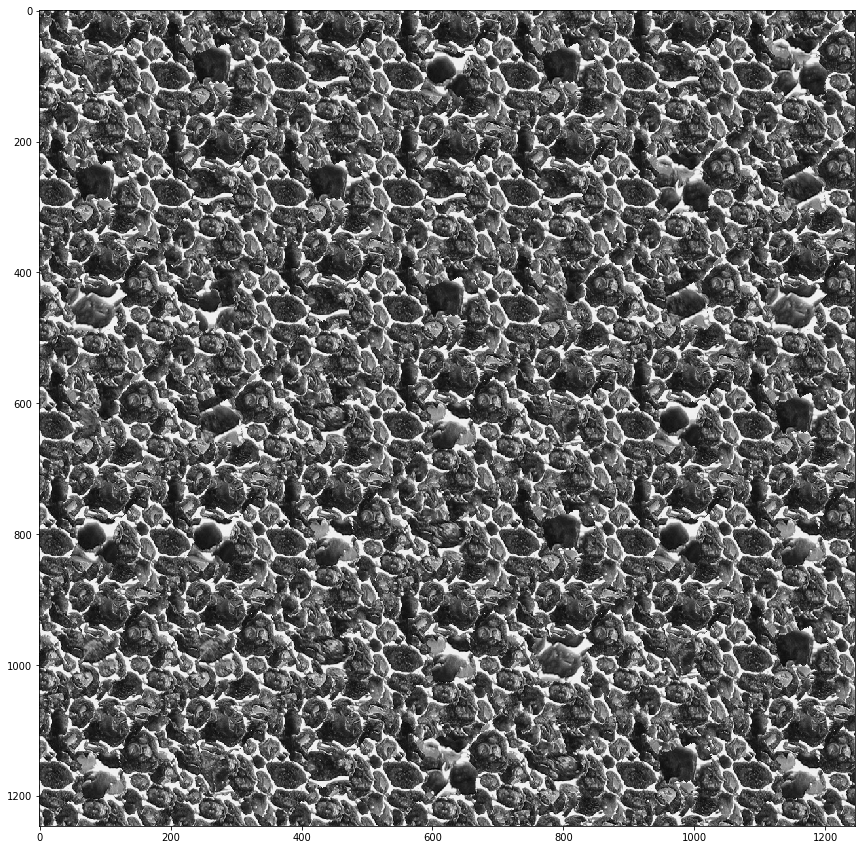

In [99]:
plt.figure(figsize=(15,15))
plt.imshow(tiled, cmap = 'gray')
plt.imsave('synthesized_enriched_30_80_200.jpg', tiled, cmap='gray')

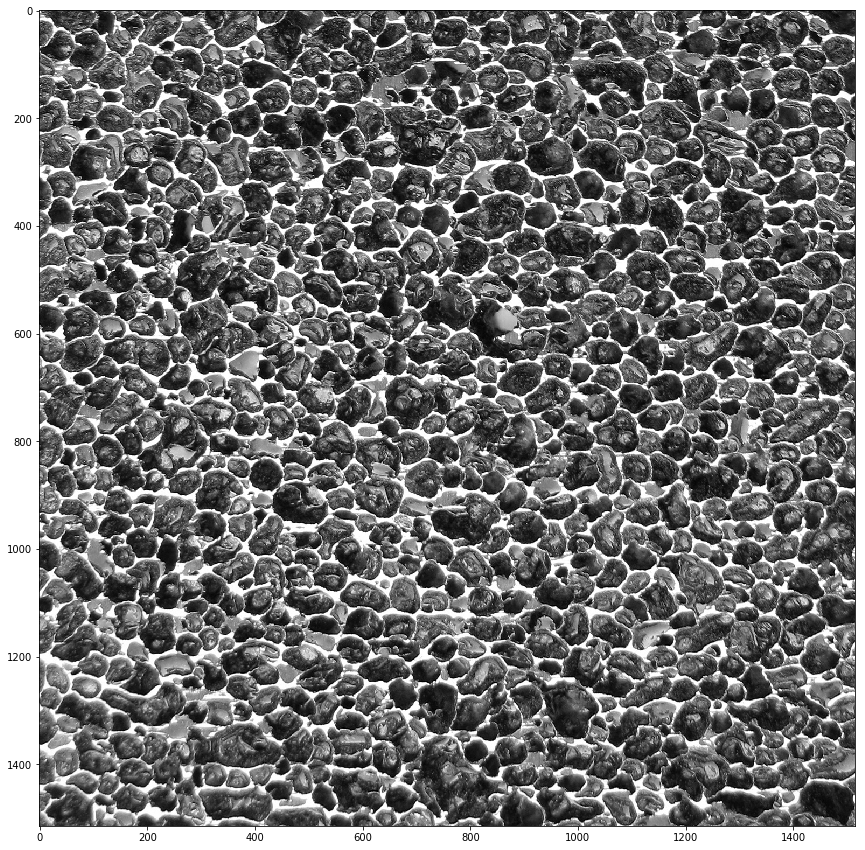

In [269]:
plt.figure(figsize=(15,15))
plt.imshow(image, cmap = 'gray')
plt.imsave('initial.jpg', image, cmap='gray')

In [208]:
n_1 = 2
n_2 = 2
n_cs = n_1*n_2
n_NW = n_1*n_2
n_total = int(n_NW*n_cs)
#n_total = 2
l = 100
w = 21
a = l-w-1
patch_border = 2

colors = create_colors_from_texture(image, n_1+n_2, l, 45)
patch_size = a - patch_border
enrichments = create_colors_from_texture(image, n_total, patch_size, 0)
comb = find_all_combinations(n_1, n_2, n_NW)
tiles = create_tilings(comb[:n_total], colors, n_1, n_2, n_total, a, l, w)

100%|██████████| 16/16 [00:08<00:00,  1.95it/s]


100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)
100
(100, 21)


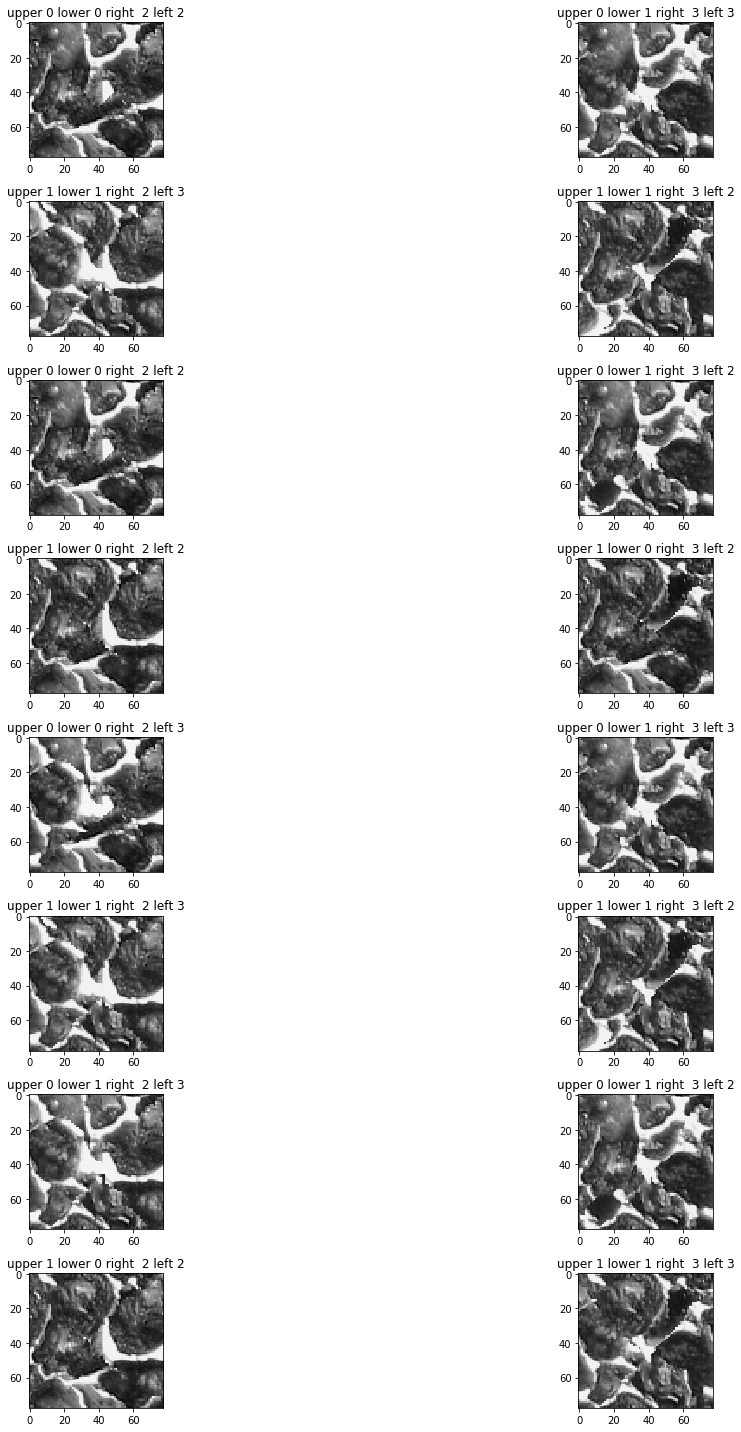

In [19]:
plt.figure(figsize = (20,20))
for i in range(n_total):
    plt.subplot(n_1*n_NW,n_2,i+1)
    plt.title('upper '+comb[i][0]+' '+'lower '+comb[i][2]+' '+'right '+' '+comb[i][1]+' '+'left '+comb[i][3])
    plt.imshow(tiles[comb[i]], cmap='gray')
    
plt.tight_layout()

In [20]:
#enriched_tiles = enrich_tiles(tiles, enrichments, 10)
#tiles_1 = copy.deepcopy(tiles)
#tiles = enriched_tiles

height = image.shape[0]//a
width = image.shape[0]//a

whole_img = np.zeros((height*a, width*a))

prev_border = random.sample(tiles.keys(), 1)[0]
prev_tile = tiles[prev_border]
whole_img[:a,:a] = prev_tile


prev_line = ['' for i in range(width)]
prev_line[0] = prev_border


for i in range(height):
    for j in range(width):
        if i+j == 0:
            continue
            
        if i == 0:
            #print(j)
            result = {key: value for key, value in tiles.items() if key[3] == prev_border[1]}
        elif j == 0:
            #print(i,j)
            result = {key: value for key, value in tiles.items() if key[0] == prev_line[j][2]}
        else:
            #print(i,j)
            #print(prev_border)
            #print(prev_line[j])
            result = {key: value for key, value in tiles.items() \
                      if key[3] == prev_border[1] and key[0] == prev_line[j][2]}

        prev_border = random.sample(result.keys(), 1)[0]
        
        prev_tile = result[prev_border]
        prev_line[j] = prev_border
        whole_img[i*a:(i+1)*a, j*a:(j+1)*a] = prev_tile

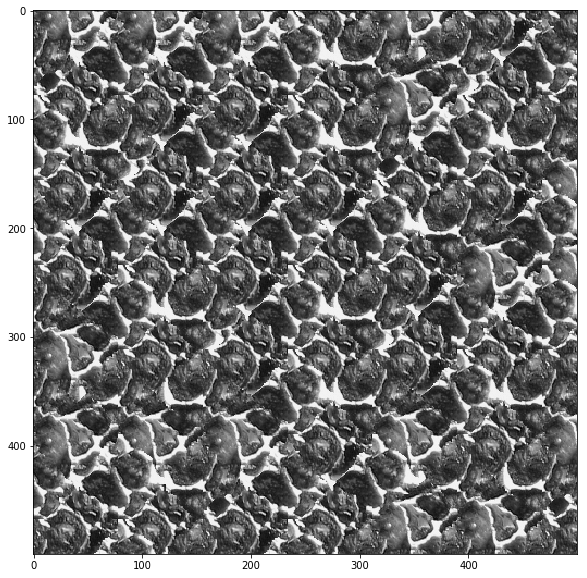

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(whole_img[:500,:500], cmap = 'gray')

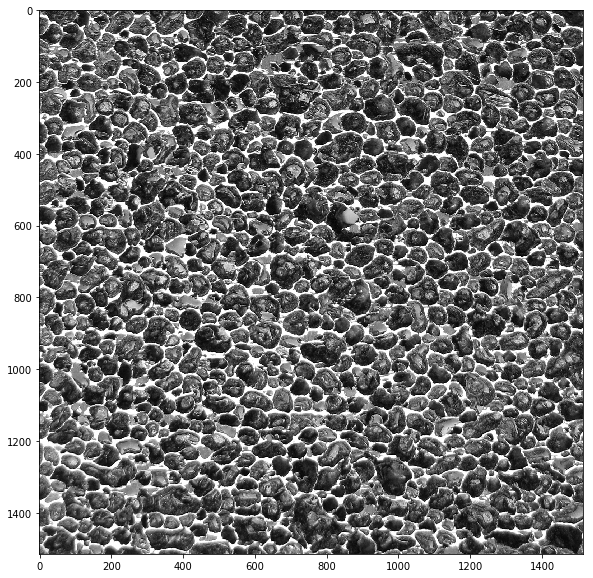

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')

### with enrichment

In [24]:
import copy

In [25]:
enriched_tiles = enrich_tiles(tiles, enrichments, 10)
#tiles_1 = copy.deepcopy(tiles)
#tiles = enriched_tiles

height = image.shape[0]//a
width = image.shape[0]//a

whole_img = np.zeros((height*a, width*a))

prev_border = random.sample(tiles.keys(), 1)[0]
prev_tile = tiles[prev_border]
whole_img[:a,:a] = prev_tile


prev_line = ['' for i in range(width)]
prev_line[0] = prev_border


for i in range(height):
    for j in range(width):
        if i+j == 0:
            continue
            
        if i == 0:
            result = {key: value for key, value in tiles.items() if key[3] == prev_border[1]}
        elif j == 0:
            result = {key: value for key, value in tiles.items() if key[0] == prev_line[j][2]}
        else:
            result = {key: value for key, value in tiles.items() \
                      if key[3] == prev_border[1] and key[0] == prev_line[j][2]}

        prev_border = random.sample(result.keys(), 1)[0]
        
        prev_tile = result[prev_border]
        prev_line[j] = prev_border
        whole_img[i*a:(i+1)*a, j*a:(j+1)*a] = prev_tile

1


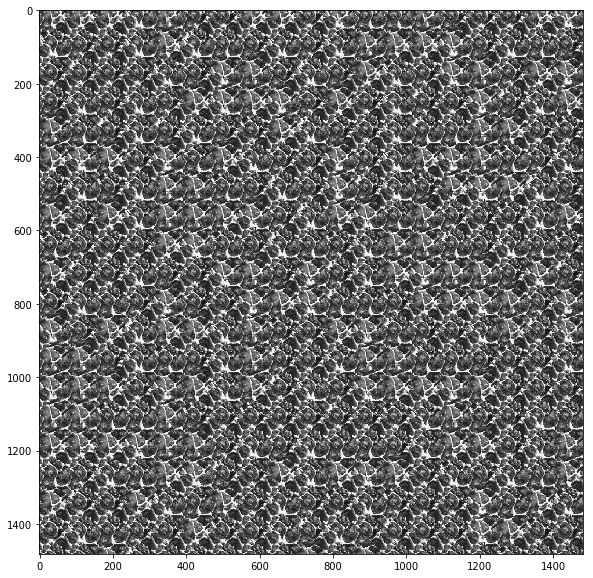

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(whole_img, cmap = 'gray')